# Complex Fitting (Example)

One way to analyze this system is by obtaining a function that fits the data. We know that simple harmonic motion has a sinusoidal profile so we will try to fit the best fit sinusoidal function. This is not as simple as using the np.polyfit but this will give you an idea of what goes behind the scenes of np.polyfit

We plot our ultrasound data again as a start. We'll use the [example data](https://drive.google.com/file/d/1uYgXroQMI59fuX8obxmDUpdy9RVS4ZYW/view?usp=sharing) from the pre-lab, but you will be expected to do this procedure on your own data for the lab report.

In [1]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [2]:
# Import all our necessary libraries
import numpy as np
import scipy.optimize as sp
import matplotlib.pyplot as plt

# Read in data using np.loadtxt. It takes in two inputs, the path to the file and a delimiter. The delimiter in this case is ','.
# Your data should have five columns - elapsed time, ultrasonic sensor distance, acceleration in x direction, acceleration in y direction, acceleration in z direction
read_in_array = np.loadtxt('/content/drive/MyDrive/testOscillation1.txt', delimiter=',')

In [3]:
# This dataset has five columns
# Take all of the elements in the 0th column to create your x-axis array
time = read_in_array[:,0]

# Elapsed time is typically always going to be the x-axis
# We are converting it from units of ms to s.
elapsed_time = (time-time[0]) / 1000.

# We create an array to store the ultrasound sensor data - this value is in cm, so we convert the unit to m.
ultrasound_unrefined = read_in_array[:,1]
ultrasound = ultrasound_unrefined / 100

# We create an array to store the acceleration in x - the axis along which simple harmonic motion takes place
acc_data_unrefined = read_in_array[:,2]

# We define our calibration function from calibrating our accelerometer (we need to input the slope and intercept here)
def output_to_accel_x(output):
  accel = slope*output + intercept
  return accel

# We convert the raw accelerometer output to acceleration in m/s^2 using the calibration function and add 9.81 to obtain the relative acceleration
acc_data = output_to_accel_x(acc_data_unrefined) + 9.81

Next, follow the process as outlined in the pre-lab for week 6 to obtain 3-4 periods of data. We skip this here and go straight to the start and stop indecies.

Text(0.5, 0, 'Time (s)')

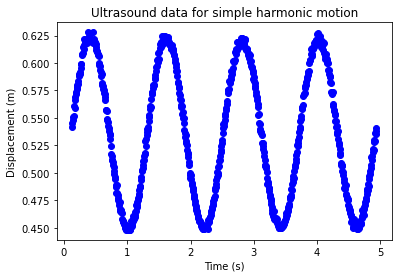

In [7]:
start_time = 20
stop_time = 754

# Select a window of 4 oscillation periods
ultrasound_window = ultrasound[start_time:stop_time]
elapsed_time_window = elapsed_time[start_time:stop_time]

# Create a scatter plot
plt.scatter(elapsed_time_window,ultrasound_window,color="blue")

# Provide a title to the plot
plt.title('Ultrasound data for simple harmonic motion')

# Label the y-axis
plt.ylabel('Displacement (m)')

# Label the x-axis
plt.xlabel('Time (s)')

The first thing we will do is try to approximately guess from the plot, the critical values to a sine function. These are the amplitude of osciallation, the angular frequency, the phase, and the offset. We will rely on scipy.optimize module's curve_fit function. We can use $\omega = \frac{2\pi}{T}$ to obtain the angular frequency guess.

In [11]:
# Make reasonable guesses for parameters like amplitude, omega, offset and phi based on the plot above 
guess_amplitude = 0.1
guess_angular_frequency = 5
guess_phase = 0
guess_offset = 0.55

# Store all the guessed parameters in an array
guess_parameters = [guess_amplitude, guess_angular_frequency, guess_phase, guess_offset]

We define a function that can generate a sine wave based on the four parameters in consideration. Remember that functions take in inputs and return a result.

In [12]:
def sin_fit_function(time, amplitude, angular_frequency, phase, offset):
  height = amplitude*np.sin(angular_frequency*time + phase) + offset
  return height

Plot the guessed function with initial guesses vs the original data.

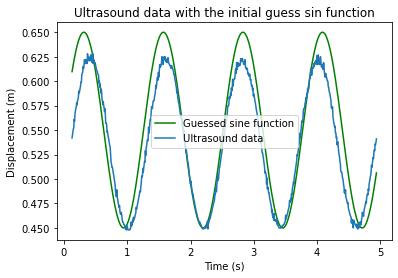

In [13]:
# Create a sin function based on original guess parameters
theoretical_guess_function = sin_fit_function(elapsed_time_window, *guess_parameters)

# Plot the guess function
plt.plot(elapsed_time_window, theoretical_guess_function, color="green", label="Guessed sine function")

# Plot the original data
plt.plot(elapsed_time_window, ultrasound_window, label="Ultrasound data")

plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.title("Ultrasound data with the initial guess sin function")
plt.legend()

Now we will use the curve_fit function to obtain our fit parameters. This will ensure that out best fit function is very close to the original data.

In [14]:
optimal_params, param_covariance = sp.curve_fit(
    sin_fit_function, elapsed_time_window, ultrasound_window, p0 = guess_parameters)

# Print the values of the best parameters
print('Best Amplitude: ' + str(optimal_params[0]))
print('Best Angular Frequency: ' + str(optimal_params[1]))
print('Best Phase: ' + str(optimal_params[2]))
print('Best Offset: ' + str(optimal_params[3]))

Best Amplitude: 0.08624916882307292
Best Angular Frequency: 5.227166876149447
Best Phase: -0.5781710849386571
Best Offset: 0.5363167954641938


We will now plot the best fit sin function based on the parameters obtained using the least squares function.

Best Amplitude: 0.08624916882307292
Best Angular Frequency: 5.227166876149447
Best Phase: -0.5781710849386571
Best Offset: 0.5363167954641938


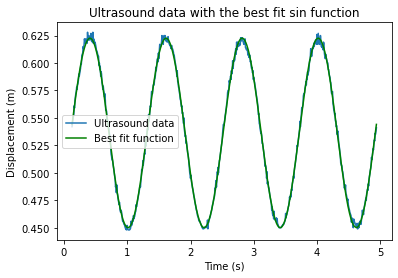

In [15]:
# The best fit sin function will have the best_parameters as an input to the sin function that we created
fitted_function = sin_fit_function(elapsed_time_window, *optimal_params)

# Plot the original data and the best fit function on the same plot
plt.plot(elapsed_time_window, ultrasound_window,label="Ultrasound data")
plt.plot(elapsed_time_window, fitted_function, color = 'green', label="Best fit function")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.legend()
plt.title("Ultrasound data with the best fit sin function")

# Print the values of the best parameters
print('Best Amplitude: ' + str(optimal_params[0]))
print('Best Angular Frequency: ' + str(optimal_params[1]))
print('Best Phase: ' + str(optimal_params[2]))
print('Best Offset: ' + str(optimal_params[3]))

We now have the best fit function to our data. Remember that this works only for a small portion of our data. Our data shows damping in the long run. However, in a smaller time frame, we can use this best fit function to verify if our accelerometer readings agree with us. The function that we obtained finds the position x at any time t. This function x(t) can be differentiated once to get velocity and differentiated again to get acceleration. 

In [16]:
# The differentiation can be done by hand and then typed into code
# vel_fit is the velocity as a function of time
vel_fit = optimal_params[0]*optimal_params[1]*np.cos(optimal_params[1]*elapsed_time_window + optimal_params[2])

# acc_fit is the acceleration as a function of time
acc_fit = -optimal_params[0]*(optimal_params[1]**2)*np.sin(optimal_params[1]*elapsed_time_window + optimal_params[2])

We can also use the numpy gradient function to obtain numerically differentiated position for velocity and acceleration.

In [ ]:
# vel_numerical is the velocity as a function of time
vel_numerical = np.gradient(ultrasound_window, elapsed_time_window)

# acc_numerical is the acceleration as a function of time
acc_numerical = np.gradient(vel_numerical, elapsed_time_window)

# Your analysis

Plot and fit your own data below 

In [ ]:
# Read in your time and position data





Define your sinusoidal fit function

In [ ]:
def sin_fit_function(time, amplitude, angular_frequency, phase, offset):
  height = amplitude*np.sin(angular_frequency*time + phase) + offset
  return height

Plot your time vs position data

In [ ]:
# Make a plot


# Axis labels


# Title




Clip your data so that you have 3-4 oscillations. Subtract off the start time from the time elements to zero out your phase.

In [ ]:
# Define your starting time

# Clip your data
# ultrasound_window = ultrasound[start_time:stop_time]
# elapsed_time_window = elapsed_time[start_time:stop_time] - elapsed_time[0]


# Make a plot



In [ ]:
# Make your guess parameters 

# Guess Amplitude

# Guess Angular Frequency

# Guess Phase = 0

# Guess Offset


# Plot your guessed fit and your data to ensure that your guess is good

# Title, axis labels, legend


In [ ]:
# Use curve_fit to get the best-fit parameters



In [ ]:
# Print out best parameters


# Best Amplitude


# Best Angular Frequency


# Best Phase


# Best Offset



In [ ]:
# Plot the fit


# Plot the data


# Title, axis labels, legend

